In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import requests
import json
warnings.filterwarnings('ignore')
#import pandas_profiling
import networkx as nx
from cdlib import algorithms, viz

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


## Loading and exploration of the CMU dataset

In [2]:
# load movies metadata tsv file to a pandas dataframe
movies_metadata = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
# load character metadata tsv file to a pandas dataframe
character_metadata = pd.read_csv('MovieSummaries/character.metadata.tsv', sep='\t', header=None)
# load plot summaries tsv file to a pandas dataframe
plot_summaries = pd.read_csv('MovieSummaries/plot_summaries.txt', sep='\t', header=None)

# name colomuns of movies metadata dataframe as follows 
# 1. Wikipedia movie ID
# 2. Freebase movie ID
# 3. Movie name
# 4. Movie release date
# 5. Movie box office revenue
# 6. Movie runtime
# 7. Movie languages (Freebase ID:name tuples)
# 8. Movie countries (Freebase ID:name tuples)
# 9. Movie genres (Freebase ID:name tuples)

movies_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime', 'Movie_languages', 'Movie_countries', 'Movie_genres'] 

# name colomuns of character metadata dataframe as follows
# 1. Wikipedia movie ID
# 2. Freebase movie ID
# 3. Movie release date
# 4. Character name
# 5. Actor date of birth
# 6. Actor gender
# 7. Actor height (in meters)
# 8. Actor ethnicity (Freebase ID)
# 9. Actor name
# 10. Actor age at movie release
# 11. Freebase character/actor map ID
# 12. Freebase character ID
# 13. Freebase actor ID

character_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_release_date', 'Character_name', 'Actor_date_of_birth', 'actor_gender', 'Actor_height_(in_meters)', 'Actor_ethnicity', 'Actor_name', 'Actor_age_at_movie_release', 'Freebase_character/actor_map_ID', 'Freebase_character_ID', 'Freebase_actor_ID']

# name colomuns of plot summaries dataframe as follows
# 1. Wikipedia movie ID
# 2. Plot summary

plot_summaries.columns = ['Wikipedia_movie_ID', 'Plot_summary']

In [3]:
character_metadata

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,actor_gender,Actor_height_(in_meters),Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [4]:
# # profile the movies metadata dataframe
# movies_metadata.profile_report(title='Movies Metadata Report')
# # save the report to a html file
# movies_metadata.profile_report(title='Movies Metadata Report').to_file(output_file="movies_metadata_report.html")

In [5]:
# # profile the character metadata dataframe
# character_metadata.profile_report(title='Character Metadata Report')
# # save the report to a html file
# character_metadata.profile_report(title='Character Metadata Report').to_file(output_file="character_metadata_report.html")

## cleaning the data

In [6]:
# filter characters metadata dataframe to keep only the characters where the Freebase ID and actor name are not null
characters_before_filter = character_metadata.shape[0]
character_metadata = character_metadata[character_metadata['Freebase_actor_ID'].notnull() & character_metadata['Actor_name'].notnull()]
# show how many characters were originally in the dataframe, how many were removed and how many are left
print('Number of characters before filter: ', characters_before_filter)
print('Number of characters after filter: ', character_metadata.shape[0])
print('Number of characters removed: ', characters_before_filter - character_metadata.shape[0])

Number of characters before filter:  450669
Number of characters after filter:  449441
Number of characters removed:  1228


In [7]:
# list the characters of each movie in a list and the actors of each movie in a list
actors = character_metadata.groupby('Wikipedia_movie_ID')['Actor_name'].apply(list).reset_index().rename(columns={'Actor_name': 'Actors_names'})
# count the actors of each movie
actors['Number_of_actors'] = actors['Actors_names'].apply(lambda x: len(x))
# filter the actors dataframe to keep only the movies with more than 2 actors
actors = actors[actors['Number_of_actors'] >= 2].reset_index(drop=True)
# show the number of movies before and after the filter and how many movies were removed
print('Number of movies before filter: ', character_metadata['Wikipedia_movie_ID'].nunique())
print('Number of movies after filter: ', actors.shape[0])
print('Number of movies removed: ', character_metadata['Wikipedia_movie_ID'].nunique() - actors.shape[0])


Number of movies before filter:  64258
Number of movies after filter:  55466
Number of movies removed:  8792


## Further exploration of cleaned data

In [8]:
actors

,Wikipedia_movie_ID,Actors_names,Number_of_actors
0,330,"[Rosa Maria Sardà, Mercè Pons, Anna Lizaran, N...",4
1,3217,"[Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce ...",14
2,3333,"[Lillian Gish, Henry B. Walthall, Mae Marsh, S...",14
3,3746,"[William Sanderson, Harrison Ford, Rutger Haue...",15
4,3837,"[Jack Starrett, Slim Pickens, Dave Sharpe, Lia...",20
...,...,...,...
55461,37373877,"[Gabrielle Anwar, Traci Lords, Dina Meyer, Geo...",7
55462,37476824,"[Zayed Khan, Raveena Tandon, Amitabh Bachchan,...",10
55463,37478048,"[Anupam Kher, Anil Kapoor, Sridevi Kapoor, Akk...",4
55464,37492363,"[Molly Cera, Taylor Marie Milton, Spencer Jenk...",3


,Wikipedia_movie_ID,Number_of_actors
count,5.546600e+04,55466.000000
mean,1.543092e+07,7.944489
std,1.084880e+07,5.217716
min,3.300000e+02,2.000000
25%,5.340157e+06,4.000000
50%,1.414526e+07,7.000000
75%,2.495716e+07,11.000000
max,3.750192e+07,115.000000


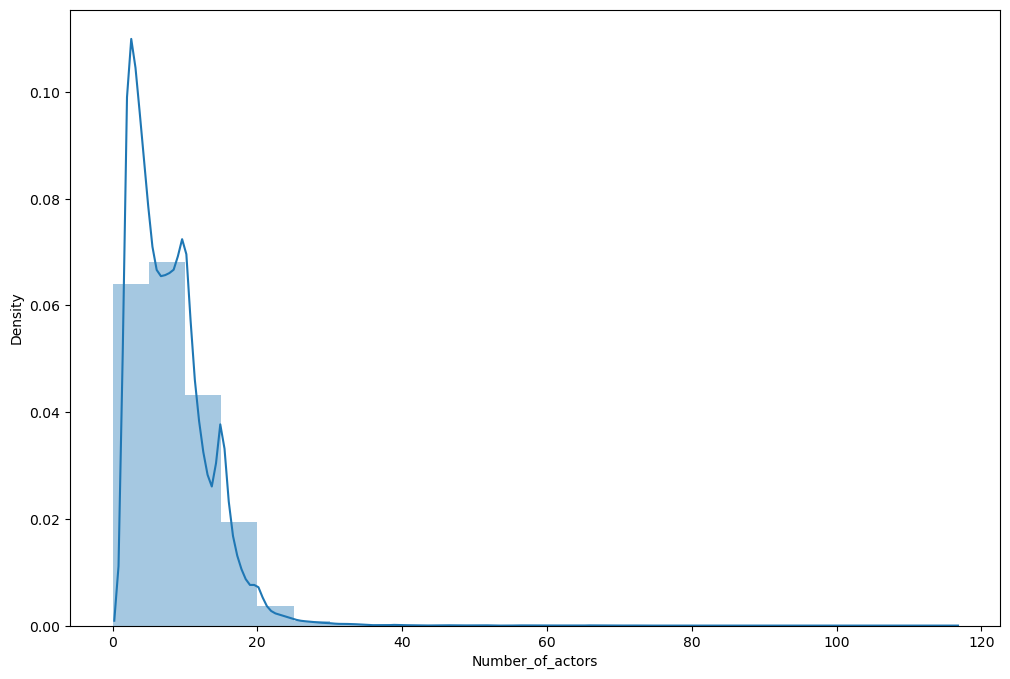

In [9]:
# plot the distribution of the number of actors per movie (histogram interval length = 5)
plt.figure(figsize=(12, 8))
sns.distplot(actors['Number_of_actors'], kde=True, bins=range(0, 120, 5))
actors.describe()

In [10]:
a = actors[actors['Number_of_actors']==115].Actors_names
type(a)

pandas.core.series.Series

In [11]:
# one actor per line in the new dataframe
actors_new_meta = actors.merge(character_metadata[['Character_name', 'Actor_name', 'Wikipedia_movie_ID']], on='Wikipedia_movie_ID', how='inner')

In [12]:
actors_new_meta[actors_new_meta['Number_of_actors']==115]['Actor_name'].is_unique

True

## Create actors Network

In [13]:
# dataframe with pairs of actors and the number of movies they acted in together
# the dataframe to merge contains all the actors_new_meta dataframe except the actors_names column
to_merge = actors_new_meta.drop('Actors_names', axis=1)
actors_pairs = to_merge.merge(to_merge, on=['Wikipedia_movie_ID', 'Number_of_actors'], how='inner')
# filter the dataframe to keep only the pairs where the actor names are different
actors_pairs = actors_pairs[actors_pairs['Actor_name_x'] != actors_pairs['Actor_name_y']]
# filter the dataframe to keep only the pairs that are not interchangeable (actor1, actor2) and (actor2, actor1)
actors_pairs = actors_pairs[actors_pairs['Actor_name_x'] < actors_pairs['Actor_name_y']]

In [14]:
# for each pair make a new column with the list of movies they acted in together
actors_pairs_common_movies = actors_pairs.groupby(['Actor_name_x', 'Actor_name_y'])['Wikipedia_movie_ID'].apply(list).reset_index().rename(columns={'Wikipedia_movie_ID': 'Common_movies'})
# remove the duplicates in the movies list
actors_pairs_common_movies['Common_movies'] = actors_pairs_common_movies['Common_movies'].apply(lambda x: list(set(x)))

In [15]:
actors_pairs_common_movies[actors_pairs_common_movies['Actor_name_x'] == 'Emma Watson'].sample(100)

,Actor_name_x,Actor_name_y,Common_movies
964101,Emma Watson,Logan Lerman,"[30265620, 36534974]"
964092,Emma Watson,Kelly Macdonald,[31941988]
964036,Emma Watson,Gary Oldman,"[31941988, 667371, 667372, 670407]"
964079,Emma Watson,John Hurt,"[31941988, 667361, 9834441]"
964046,Emma Watson,Harriet Walter,[12634263]
...,...,...,...
964035,Emma Watson,Freddie Stroma,"[9834441, 31941988, 858575]"
964182,Emma Watson,Suzie Toase,"[9834441, 31941988, 858575]"
964172,Emma Watson,Sigourney Weaver,[12752776]
964154,Emma Watson,Robert Hardy,"[667368, 667371, 667372, 670407]"


In [16]:
# number of common movies between each pair of actors
actors_pairs_common_movies['Number_of_common_movies'] = actors_pairs_common_movies['Common_movies'].apply(lambda x: len(x))

In [17]:
actors_pairs_common_movies.sort_values(by = 'Number_of_common_movies')

,Actor_name_x,Actor_name_y,Common_movies,Number_of_common_movies
0,Cesarine Prinz\t,Adèle Boesnach,[22643470],1
1364763,Jay Adler,Joan Banks,[3957197],1
1364762,Jay Adler,Jimmy Murphy,[29880089],1
1364761,Jay Adler,Jerry Lewis,[6566456],1
1364760,Jay Adler,Jean Porter,[3957197],1
...,...,...,...,...
1644149,Larry Fine,Samuel Howard,"[10788870, 14738953, 20017674, 13730827, 13702...",82
1896233,Oliver Hardy,Stan Laurel,"[5467648, 5603842, 7939594, 6169108, 2163735, ...",101
698296,Curly Howard,Larry Fine,"[14503425, 14240262, 20017674, 8224272, 147369...",119
698325,Curly Howard,Moe Howard,"[14503425, 14240262, 20017674, 8224272, 147369...",119


In [18]:
# filter the dataframe to keep only the pairs that acted in more than 3 movies together
actors_pairs_common_movies_filtered = actors_pairs_common_movies[actors_pairs_common_movies['Number_of_common_movies'] > 2]

In [19]:
actors_pairs_common_movies_filtered

,Actor_name_x,Actor_name_y,Common_movies,Number_of_common_movies
242,50 Cent,Ambyr Childers,"[24150888, 31738289, 33638321]",3
293,50 Cent,Dr. Dre,"[25010699, 6501095, 3914063]",3
439,50 Cent,Val Kilmer,"[27211939, 19547540, 30244564]",3
1420,A. Michael Baldwin,Angus Scrimm,"[1802400, 3305282, 3305261, 12213358]",4
1421,A. Michael Baldwin,Bill Thornbury,"[1802400, 3305282, 3305261]",3
...,...,...,...,...
2074551,Yuko Kobayashi,高田由美,"[5396840, 5397050, 4174679]",3
2074552,Yuko Miyamura,Yuriko Yamaguchi,"[2017072, 1714278, 13165463]",3
2074619,Yuri Amano,Yūko Mizutani,"[5396840, 5397050, 4174679]",3
2074620,Yuri Amano,高田由美,"[5396840, 5397050, 4174679]",3


In [20]:
# create a non directed graph from the dataframe
G = nx.from_pandas_edgelist(actors_pairs_common_movies_filtered, source='Actor_name_x', target='Actor_name_y', edge_attr='Number_of_common_movies')
# show the number of nodes and edges in the graph
print('Number of nodes: ', G.number_of_nodes())
print('Number of edges: ', G.number_of_edges())

Number of nodes:  8632
Number of edges:  26288


In [21]:
# make partitions of the graph 
coms = algorithms.louvain(G, weight='Number_of_common_movies', randomize=False)
subgraphs = [G.subgraph(c) for c in coms.communities]
# show the number of subgraphs
print('Number of communities: ', len(subgraphs))
# show the number of nodes in each subgraph and the average weight of the edges in each subgraph
for i, subgraph in enumerate(subgraphs):
    print('community ', i + 1, ' number of actors: ', subgraph.number_of_nodes())
    print('community ', i + 1, ' average numbers of movies between actors: ', subgraph.size(weight='Number_of_common_movies') / subgraph.number_of_edges())

Number of communities:  666
community  1  number of actors:  1096
community  1  average numbers of movies between actors:  3.487487969201155
community  2  number of actors:  986
community  2  average numbers of movies between actors:  3.6922279792746115
community  3  number of actors:  722
community  3  average numbers of movies between actors:  4.480334410032301
community  4  number of actors:  578
community  4  average numbers of movies between actors:  3.6983408748114632
community  5  number of actors:  436
community  5  average numbers of movies between actors:  5.0072090628218335
community  6  number of actors:  349
community  6  average numbers of movies between actors:  4.817860300618921
community  7  number of actors:  277
community  7  average numbers of movies between actors:  3.972099853157122
community  8  number of actors:  257
community  8  average numbers of movies between actors:  3.779472954230236
community  9  number of actors:  196
community  9  average numbers of mo

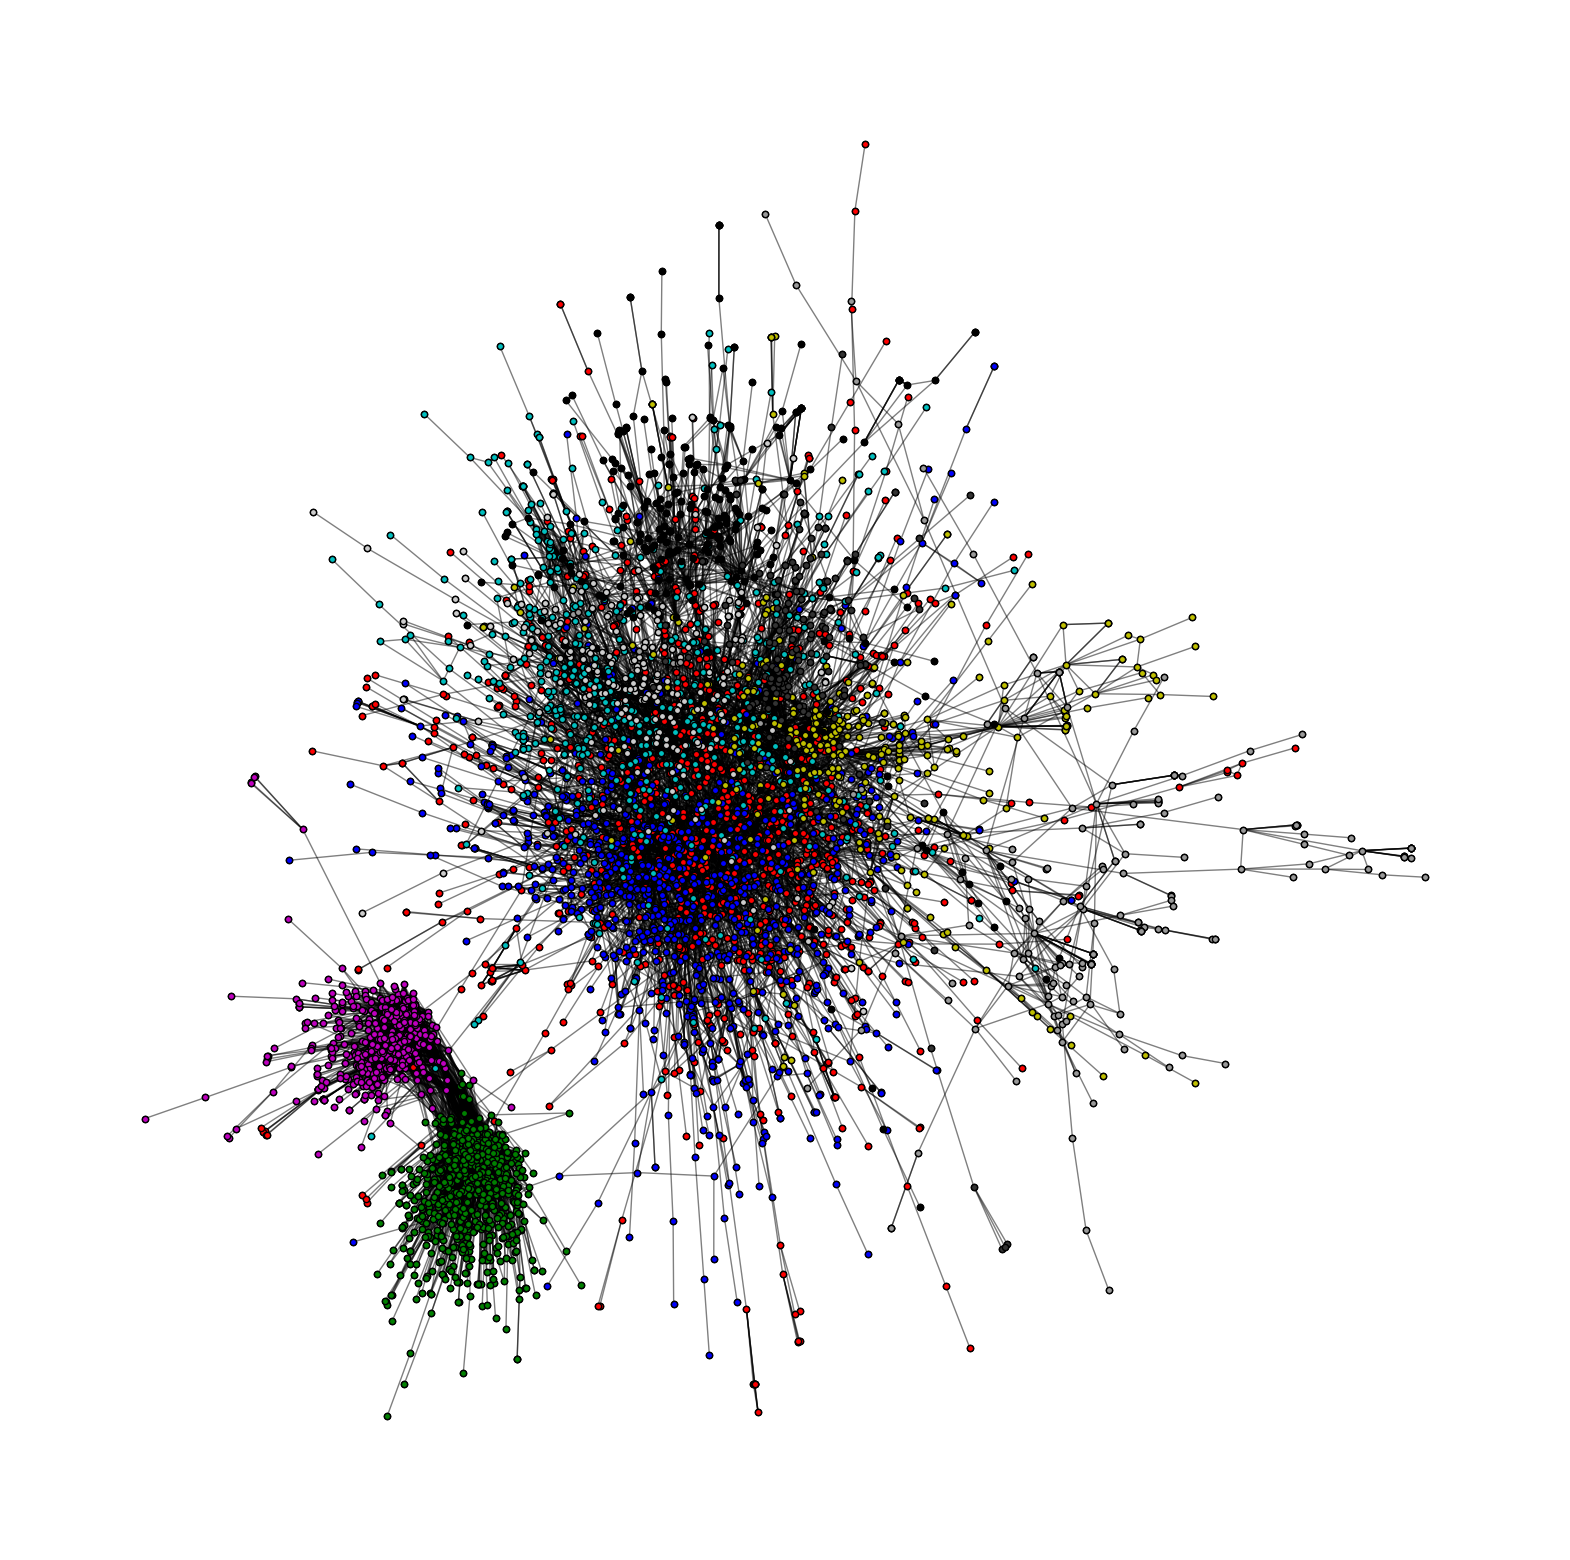

In [22]:
# vizualise the obtained partitions (top 10 communities)
import cdlib
from cdlib import viz
viz.plot_network_clusters(G, coms, node_size=20, figsize=(20, 20), plot_labels=False, top_k=10)

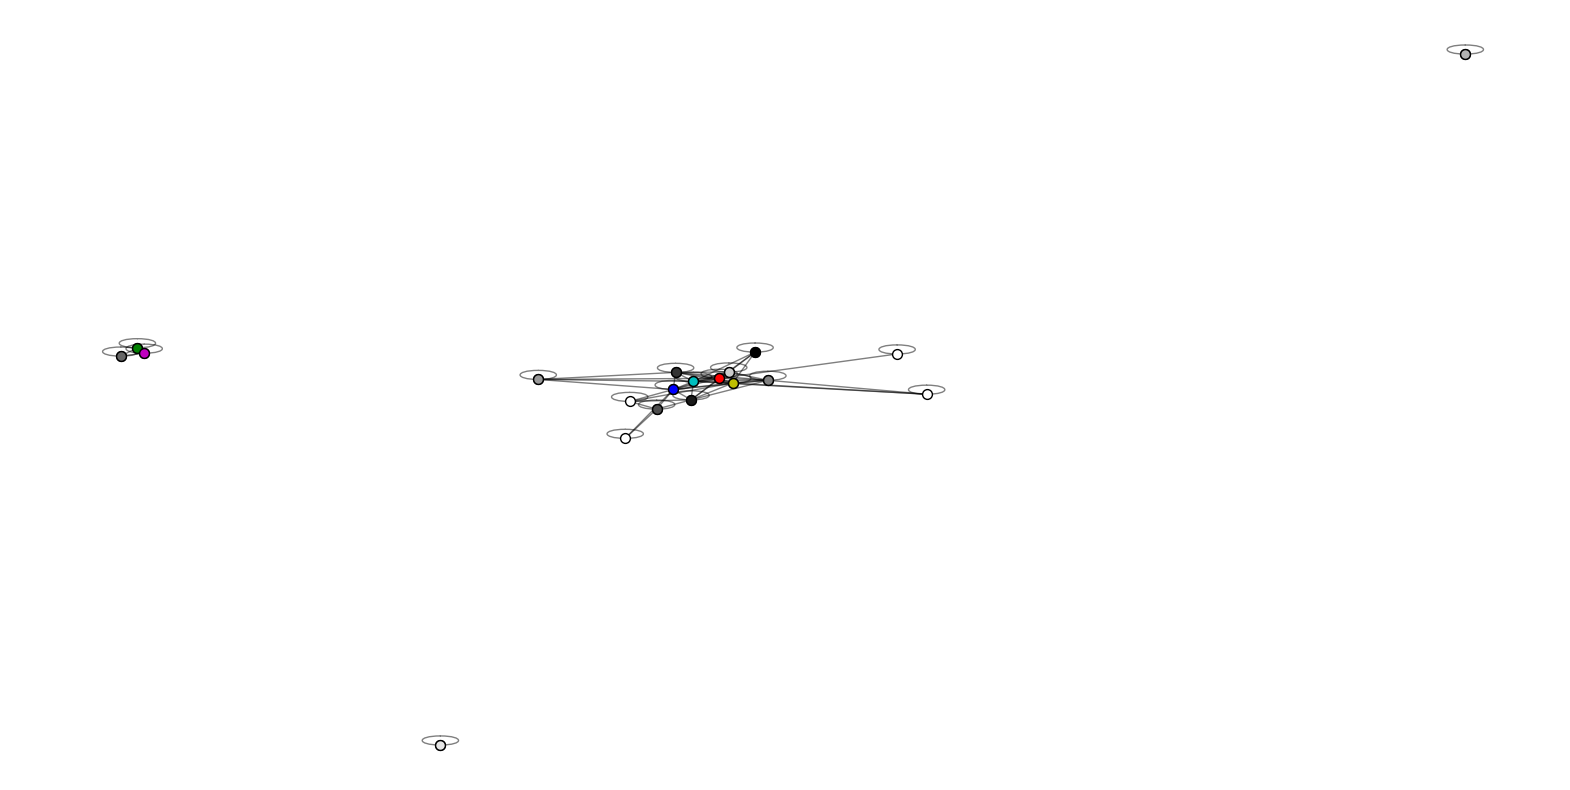

In [32]:
# vizualise the obtained partitions (all communities)
viz.plot_community_graph(G, coms, node_size=50, figsize=(20, 10), plot_labels=False, top_k=20)

In [24]:
# store the top 20 communities in dataframes
# each row in the dataframe is an actor in the community, the connectivity column represents the total weight of the edges that the actor is connected to
# i.e the total number of movies the actor acted in with the other actors in the community
top_20_communities = []
for i, subgraph in enumerate(subgraphs[:20]):
    top_20_communities.append(pd.DataFrame(subgraph.degree(weight='Number_of_common_movies'), columns=['Actor_name', 'connectivity']).sort_values('connectivity', ascending=False))

In [25]:
# for each community add columns for actors ethnicity, gender and date of birth from the character_metadata dataframe
for i, community in enumerate(top_20_communities):
    top_20_communities[i] = community.merge(character_metadata[['Actor_name','actor_gender', 'Actor_date_of_birth', 'Actor_ethnicity', 'Freebase_actor_ID']], on='Actor_name', how='inner').drop_duplicates(subset=['Actor_name']).reset_index(drop=True)
    top_20_communities[i]['community'] = i + 1


In [26]:
# make a dataframe that contains all actors from top 20 community, add a column for the community number(1-20)
top_20_communities_all_actors = pd.concat(top_20_communities).reset_index(drop=True)


In [27]:
top_20_communities_all_actors

,Actor_name,connectivity,actor_gender,Actor_date_of_birth,Actor_ethnicity,Freebase_actor_ID,community
0,Steve Buscemi,136,M,1957-12-13,/m/0xnvg,/m/01wbg84,1
1,Samuel L. Jackson,134,M,1948-12-21,/m/0x67,/m/0f5xn,1
2,Adam Sandler,117,M,1966-09-09,/m/041rx,/m/0pz91,1
3,Kevin Smith,98,M,1963-03-16,NaN,/m/0k1qm,1
4,Matt Damon,98,M,1970-10-08,/m/0cnvdq1,/m/0169dl,1
...,...,...,...,...,...,...,...
6254,Stina Ekblad,3,F,1954-02-26,/m/01d7kx,/m/07vcps,20
6255,Mako,3,M,1933-12-10,/m/01336l,/m/04bdlg,20
6256,Ernst Günther,3,M,1933-06-03,NaN,/m/0ch3d3c,20
6257,Rikard Wolff,3,M,1958-04-08,NaN,/m/0c3l2x,20


In [28]:
top_20_communities_all_actors
# save to csv
top_20_communities_all_actors.to_csv('top_20_communities_all_actors.csv', index=False)

In [57]:
df = top_20_communities_all_actors.groupby('community')

df_fill = df.agg('count')
#df_fill[['connectivity','actor_gender','Actor_date_of_birth','Actor_ethnicity']]/4
df_fill['actor_gender'] = df_fill.apply(lambda r: r.actor_gender/r.Actor_name*100,axis = 1)
df_fill['connectivity'] = df_fill.apply(lambda r: r.connectivity /r.Actor_name*100,axis = 1)
df_fill['Actor_date_of_birth'] = df_fill.apply(lambda r: r.Actor_date_of_birth/r.Actor_name*100,axis = 1)
df_fill['Actor_ethnicity'] = df_fill.apply(lambda r: r.Actor_ethnicity/r.Actor_name*100,axis = 1)
df_fill

# gender is always here
# date of birth never less than 70%
# ethnicity very small representation (no more than 60% values)

,Actor_name,connectivity,actor_gender,Actor_date_of_birth,Actor_ethnicity,Freebase_actor_ID
community,,,,,,
1,1096,100.0,99.635036,97.445255,46.441606,1096
2,986,100.0,99.492901,98.681542,14.300203,986
3,722,100.0,99.861496,66.066482,60.664820,722
4,578,100.0,99.826990,98.615917,26.643599,578
5,436,100.0,98.623853,73.853211,41.055046,436
6,349,100.0,99.713467,97.707736,27.507163,349
7,277,100.0,96.028881,87.364621,12.635379,277
8,257,100.0,100.000000,98.443580,47.470817,257
9,196,100.0,97.448980,95.408163,54.591837,196


In [ ]:
# now I want to count the different values 